# Import Libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Reading Dataset

In [12]:
spds=pd.read_csv("C:\datasets\Advertising.csv")

In [13]:
spds.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [14]:
spds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [15]:
spds.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Remove unnecessary column

In [16]:
spds=spds.drop('Unnamed: 0',axis=1)

In [17]:
spds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [18]:
spds.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [19]:
spds.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [20]:
spds.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [21]:
spds.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [22]:
spds.shape

(200, 4)

In [25]:
spds.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


# HEATMAP

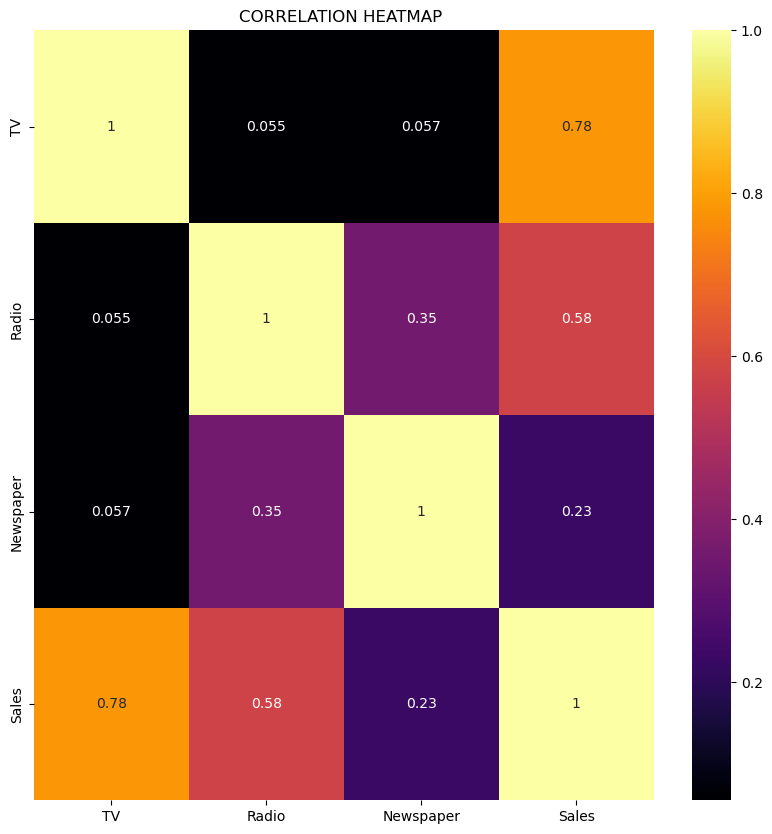

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(spds.corr(),cmap="inferno",annot=True)
plt.title("CORRELATION HEATMAP ")
plt.show()

In [48]:
px.scatter(spds,x="TV",y="Radio",title="TV VS RADIO",height=600,width=800)

In [51]:
px.scatter(spds,x="Radio",y="Newspaper",title="RADIO VS NEWSPAPER",height=500,width=800)

In [53]:
px.scatter(spds,x="Newspaper",y="TV",title="NEWSPAPER VS TV",height=500,width=800)

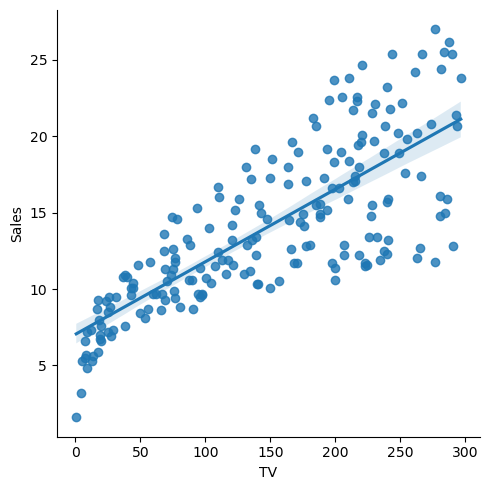

In [65]:
sns.lmplot(x="TV",y="Sales",data=spds)

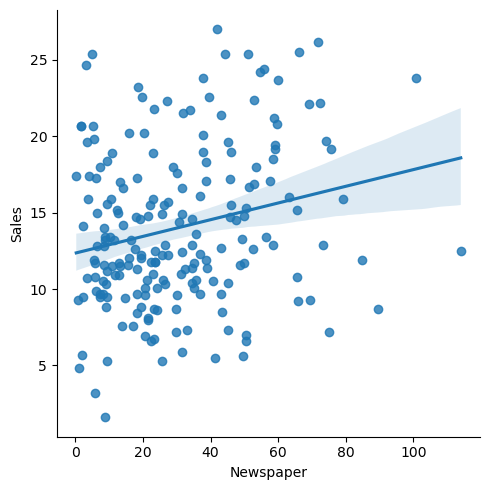

In [66]:
sns.lmplot(x="Newspaper",y="Sales",data=spds)

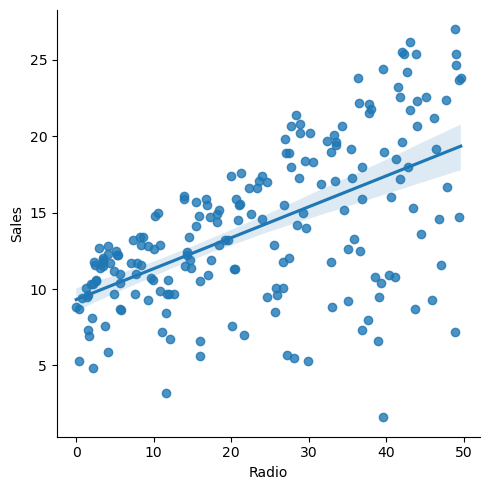

In [67]:
sns.lmplot(x="Radio",y="Sales",data=spds)

# TRAINING THE DATASET

In [68]:
spds

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [69]:
x=spds.drop("Sales",axis=1)
y=spds[["Sales"]]

In [70]:
x.shape

(200, 3)

In [71]:
y.shape

(200, 1)

In [77]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [78]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   200 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [81]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((140, 3), (140, 1), (60, 3), (60, 1))

In [82]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [83]:
model.fit(x_train,y_train)

LinearRegression()

In [84]:
model.intercept_

array([2.88025529])

In [85]:
model.coef_

array([[0.04391531, 0.20027962, 0.00184368]])

In [89]:
predict=model.predict(x_test)
x_test

,TV,Radio,Newspaper
18,69.2,20.5,18.3
170,50.0,11.6,18.4
107,90.4,0.3,23.2
98,289.7,42.3,51.2
177,170.2,7.8,35.2
182,56.2,5.7,29.7
5,8.7,48.9,75.0
146,240.1,7.3,8.7
12,23.8,35.1,65.9
152,197.6,23.3,14.2


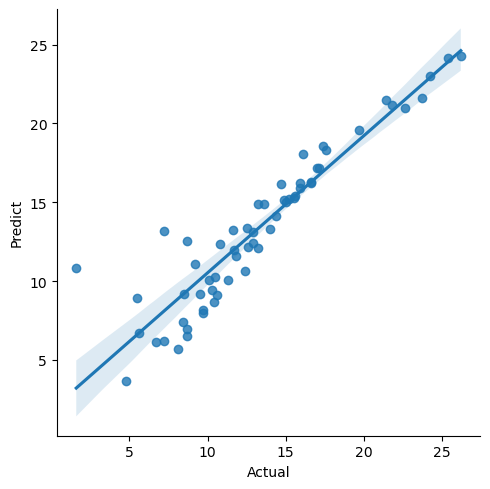

In [101]:
sns.lmplot(x="Actual",y="Predict",data=spds)

In [96]:
spds= pd.DataFrame({
    'Actual': y_test.values.flatten(), 
    'Predict': predict.flatten()})

spds.head(20)

,Actual,Predict
0,11.3,10.058667
1,8.4,7.433188
2,8.7,6.953057
3,25.4,24.168746
4,11.7,11.981720
5,8.7,6.544647
6,7.2,13.194268
7,13.2,14.902403
8,9.2,11.076753
9,16.6,16.250617


# Accuracy

In [98]:
from sklearn.metrics import r2_score
r2_score(y_test,predict)

0.8649018906637792